<a href="https://colab.research.google.com/github/Vlad-Pavliyk/-/blob/main/lab13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 276MB/s]
Archive:  sms-spam-collection-dataset.zip
replace spam.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: spam.csv                
Перші 5 рядків датасету:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Розподіл класів:
label
ham     4825
spam     747
Name: count, dtype: int64


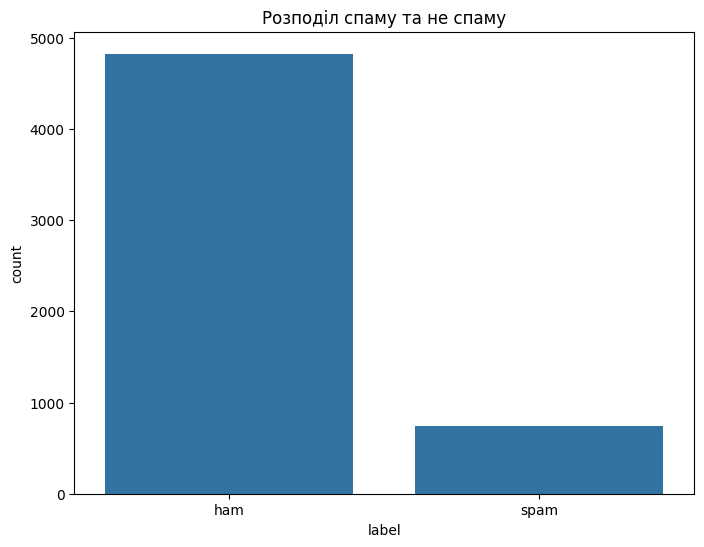


Звіт про класифікацію:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115


Матриця плутанини:
[[965   0]
 [ 42 108]]

Точність моделі: 96.23%


AttributeError: 'numpy.ndarray' object has no attribute 'replace'

In [11]:
# Крок 1: Імпорт необхідних бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('stopwords')

# Крок 2: Завантаження даних
!pip install -q kaggle
from google.colab import files
files.upload()  # Завантажте свій API ключ Kaggle тут

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d uciml/sms-spam-collection-dataset
!unzip sms-spam-collection-dataset.zip

# Завантаження даних
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]  # Вибір потрібних стовпців
df.columns = ['label', 'message']  # Перейменування стовпців

# Крок 3: Аналіз даних
print("Перші 5 рядків датасету:")
print(df.head())

print("\nРозподіл класів:")
print(df['label'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Розподіл спаму та не спаму')
plt.show()

# Крок 4: Підготовка даних
# Перетворення міток на числові значення
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Токенізація та очищення тексту
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Видалення пунктуації
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Токенізація
    words = text.split()
    # Видалення стоп-слів та стемінг
    words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]
    return ' '.join(words)

df['cleaned_message'] = df['message'].apply(preprocess_text)

# Розділення на тренувальний та тестовий набори
X = df['cleaned_message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Векторизація тексту
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Крок 5: Побудова моделі
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Прогнозування
y_pred = model.predict(X_test_vec)

# Крок 6: Оцінка моделі
print("\nЗвіт про класифікацію:")
print(classification_report(y_test, y_pred))

print("\nМатриця плутанини:")
print(confusion_matrix(y_test, y_pred))

print("\nТочність моделі: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

# Крок 7: Виведення 200 повідомлень з прогнозами
results = pd.DataFrame({
    'Повідомлення': X_test,
    'Справжній клас': y_test.replace({0: 'ham', 1: 'spam'}),
    'Прогнозований клас': y_pred.replace({0: 'ham', 1: 'spam'})
})

print("\nПерші 200 результатів:")
pd.set_option('display.max_colwidth', None)
print(results.head(200))